# Euler Simulations

This notebook shows solution behavior for the compressible Euler equations.

Problem statement:

$$
\begin{align*}
    \frac{\partial}{\partial t}\left[\rho\right]
    &= -\frac{\partial}{\partial x}\left[\rho u\right],
    &
    \frac{\partial}{\partial t}\left[\rho u\right]
    &= -\frac{\partial}{\partial x}\left[\rho u^2 + p\right],
    &
    \frac{\partial}{\partial t}\left[\rho e\right]
    &= -\frac{\partial}{\partial x}\left[(\rho e + p)u\right].
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mpl_config
import pde_models as pdes

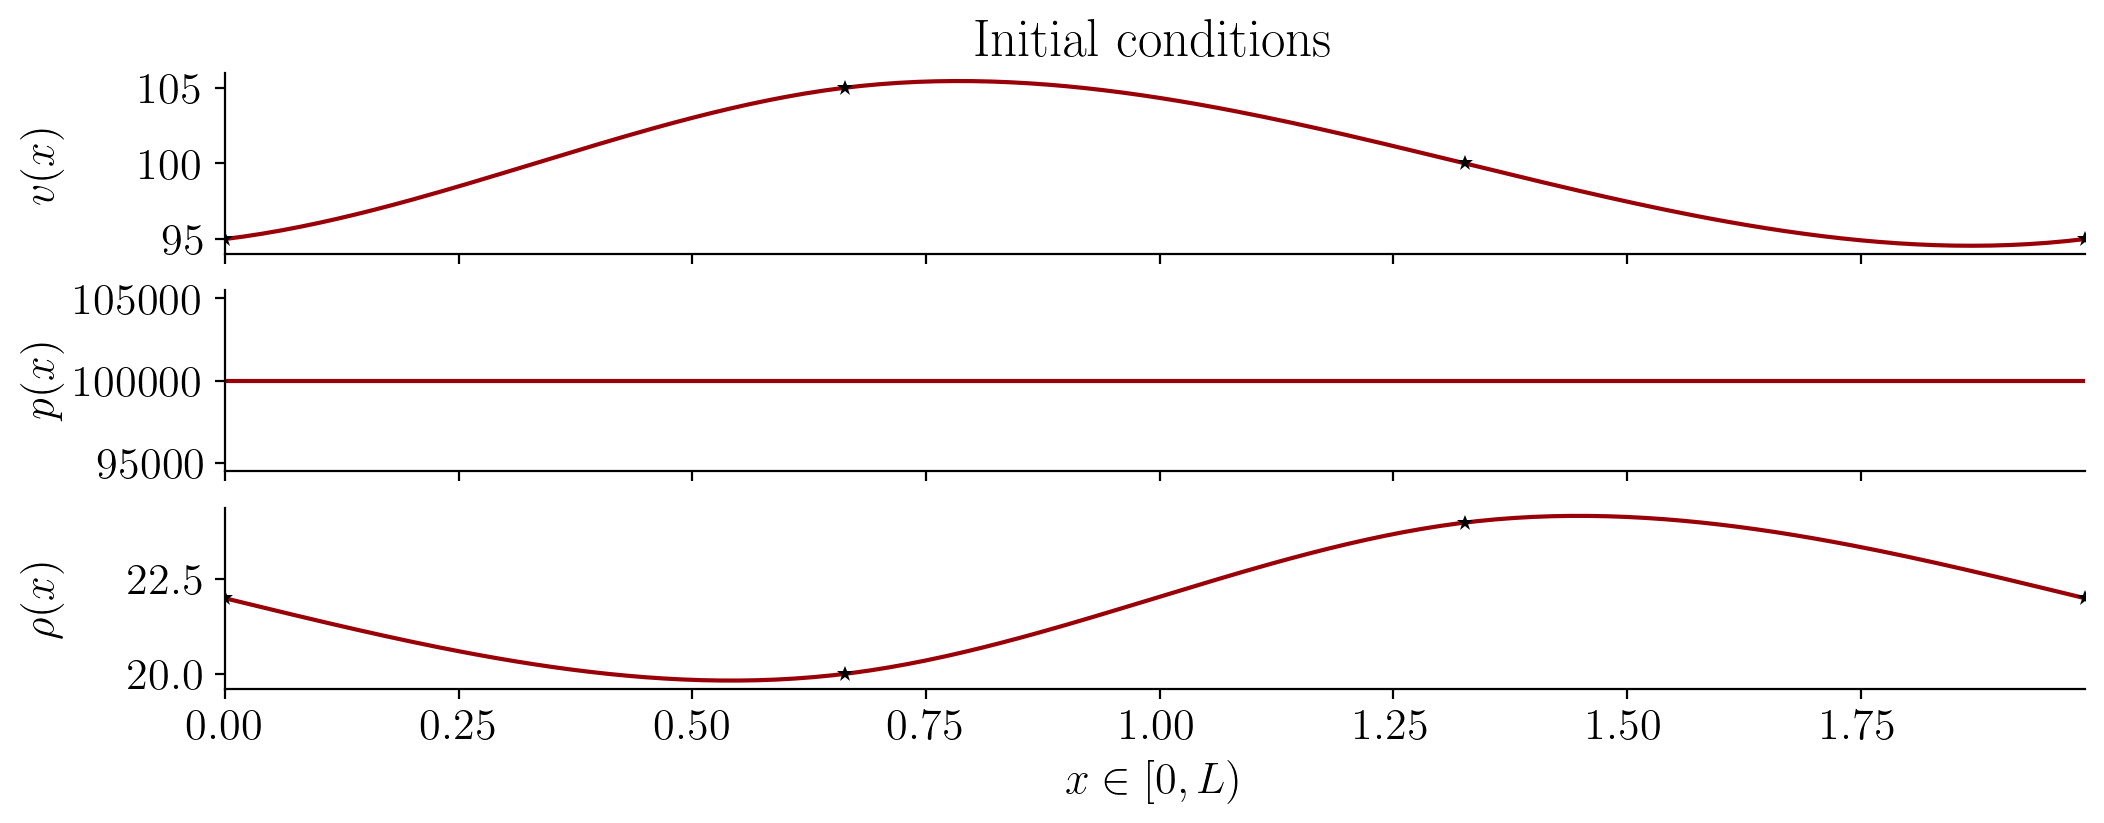

In [2]:
x = np.linspace(0, 2, 201)[:-1]
t = np.linspace(0, 1e-1, 500)

eulersolver = pdes.Euler(x)
q0 = eulersolver.initial_conditions(
    [22, 20, 24, 95, 105, 100],
    plot=True,
)
plt.show()

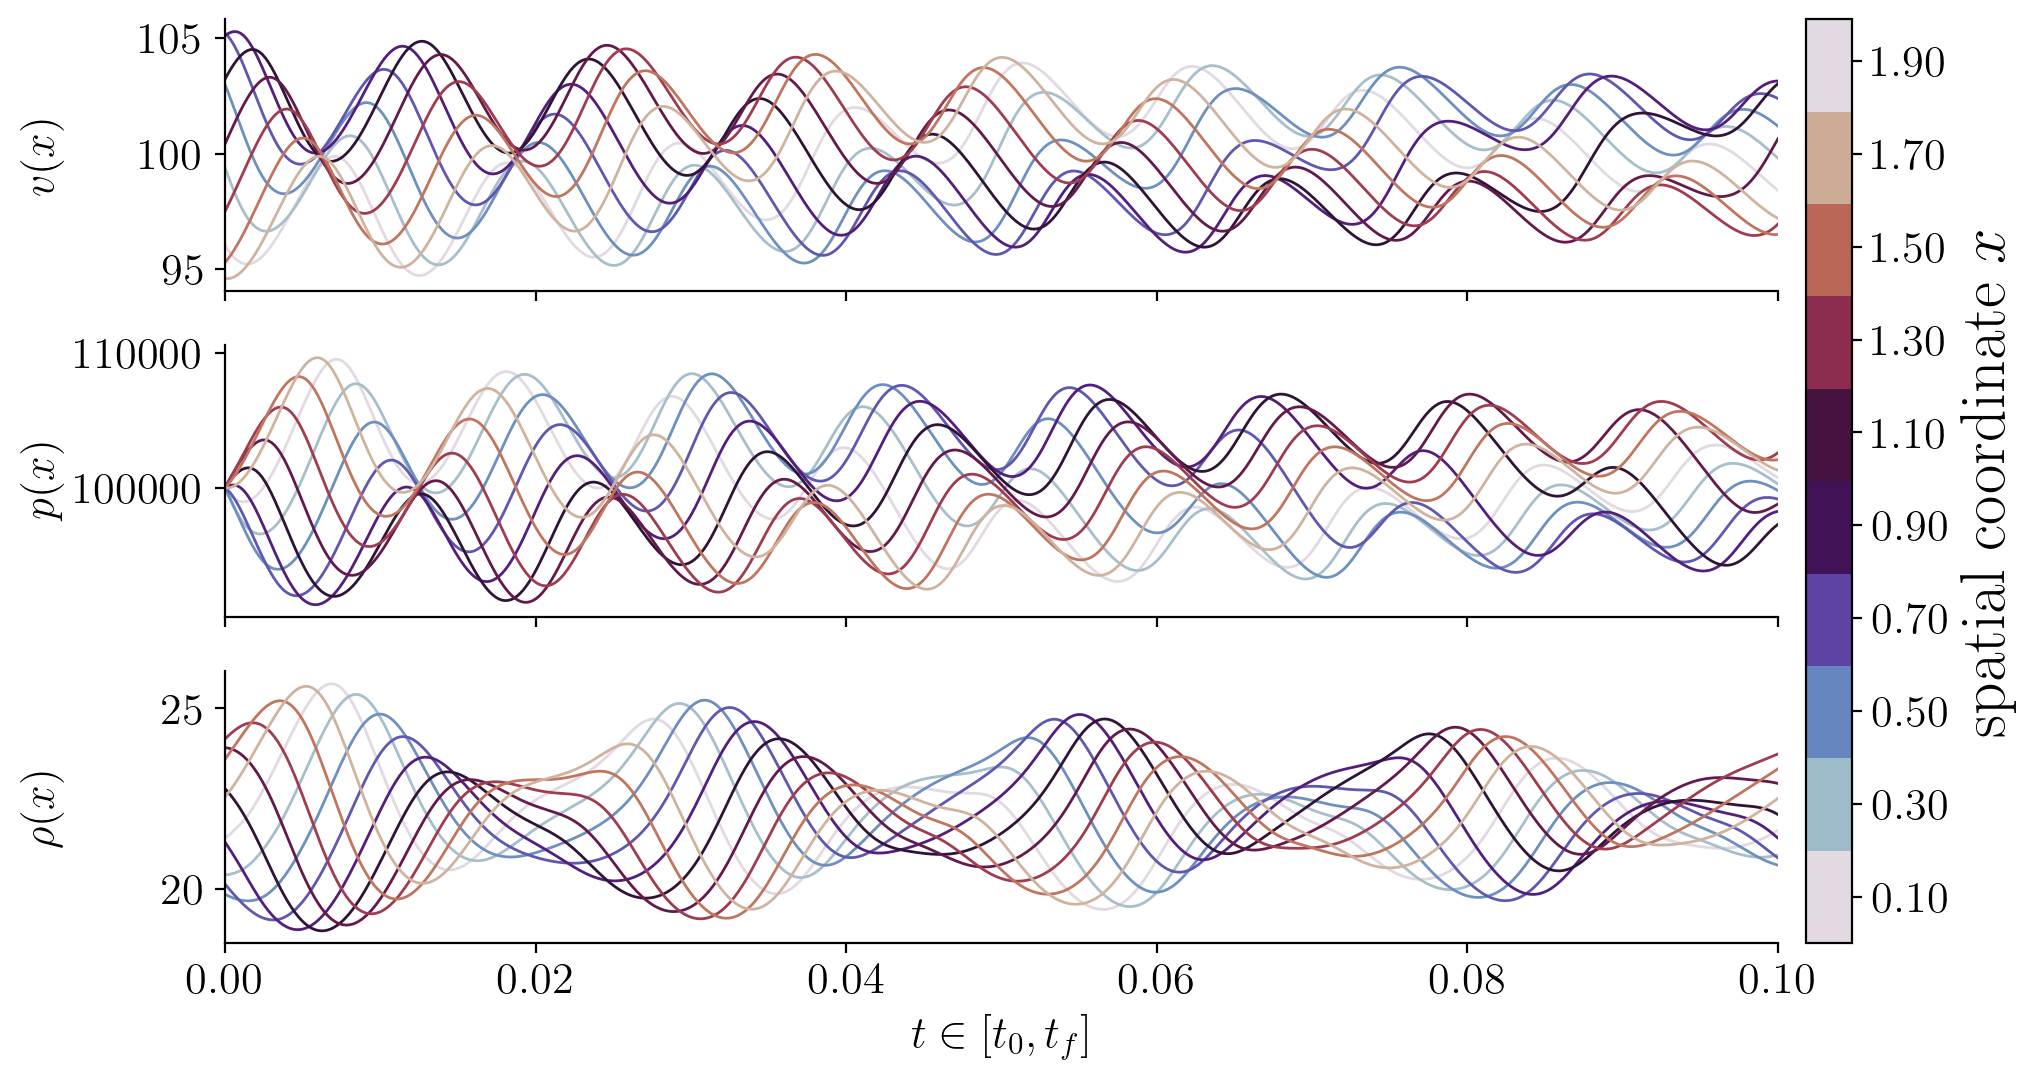

In [3]:
solution = eulersolver.solve(q0, t)

fig, axes = eulersolver.plot_traces(t, solution, nlocs=10)
plt.show()

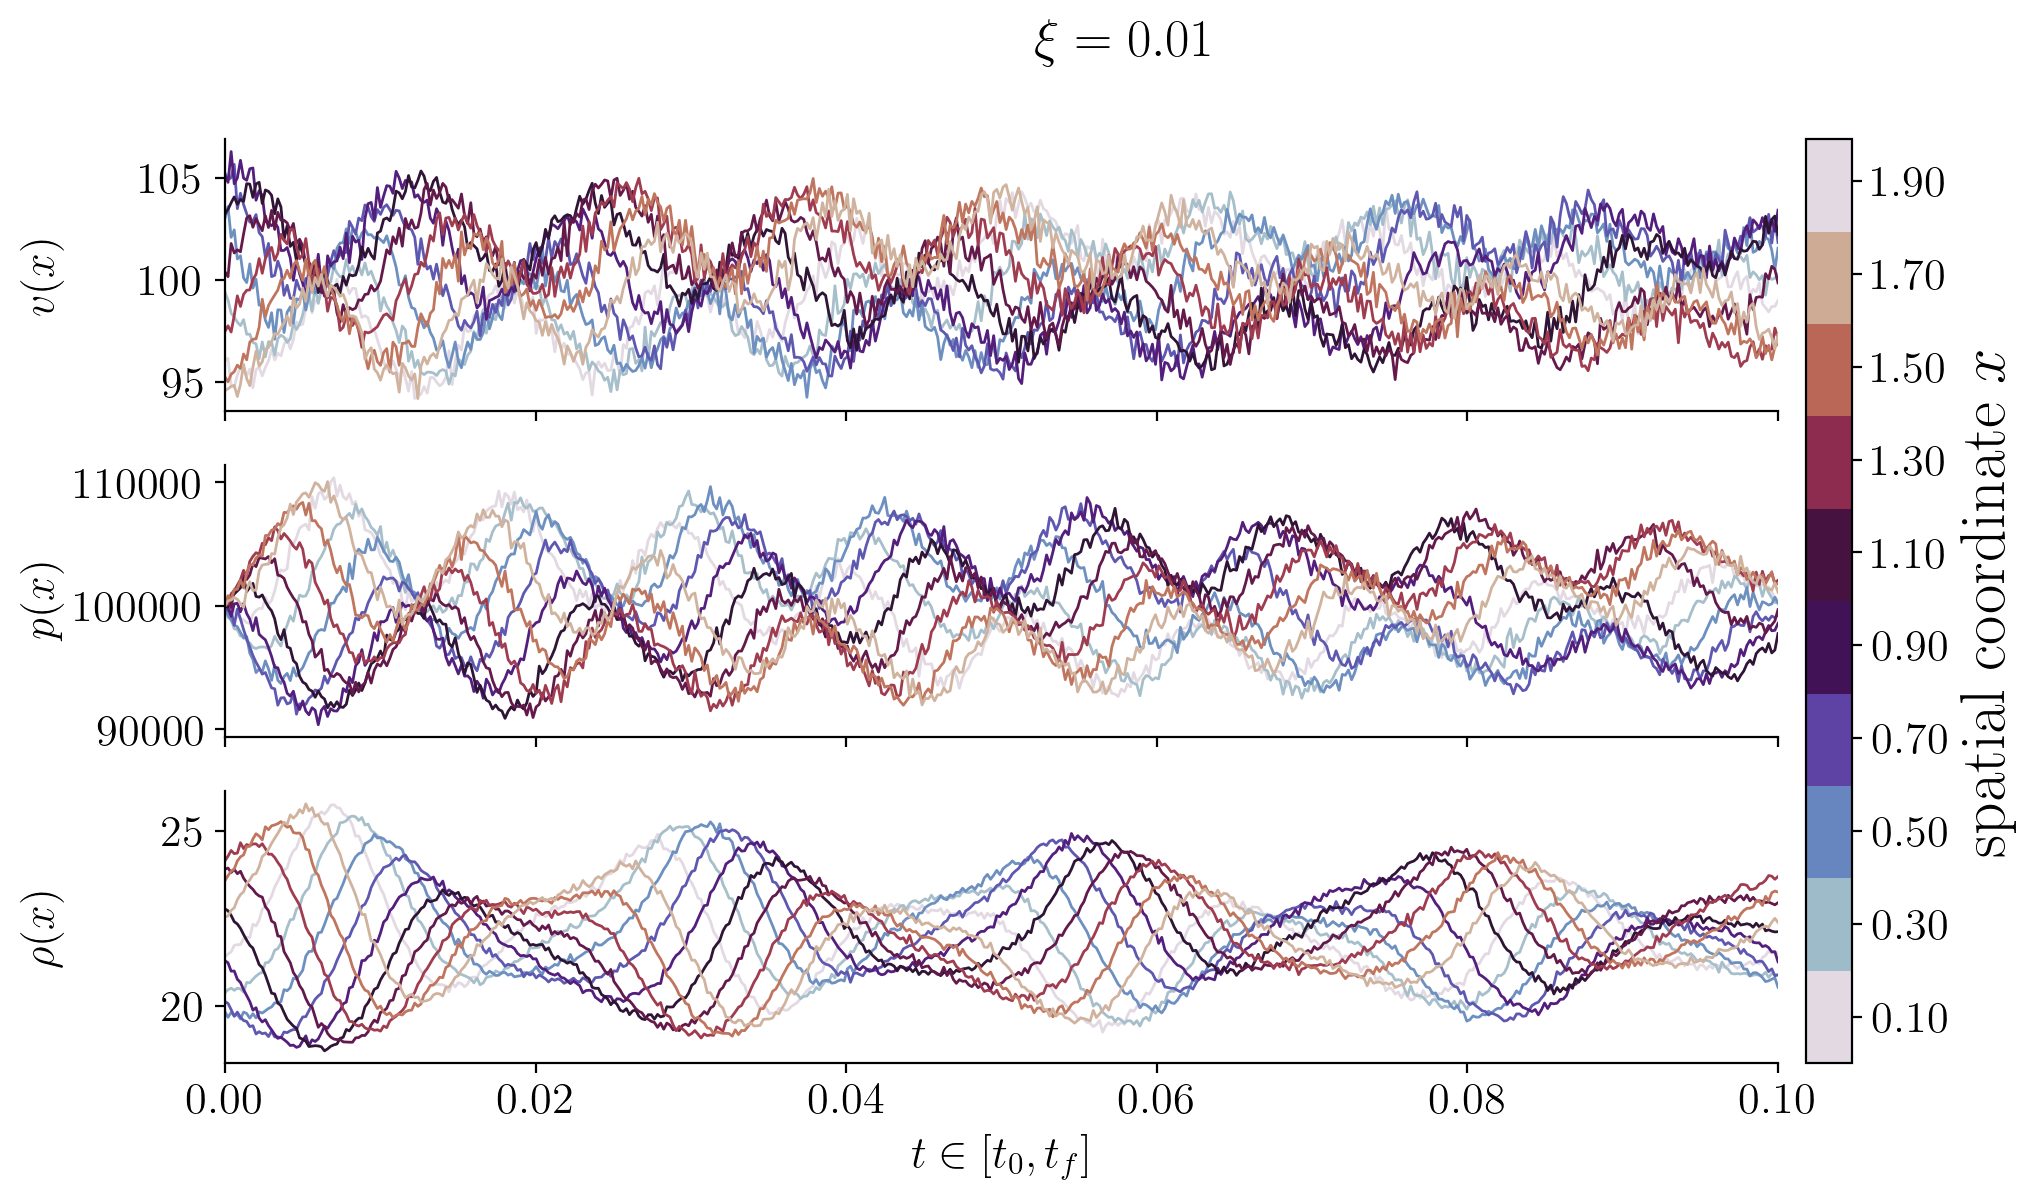

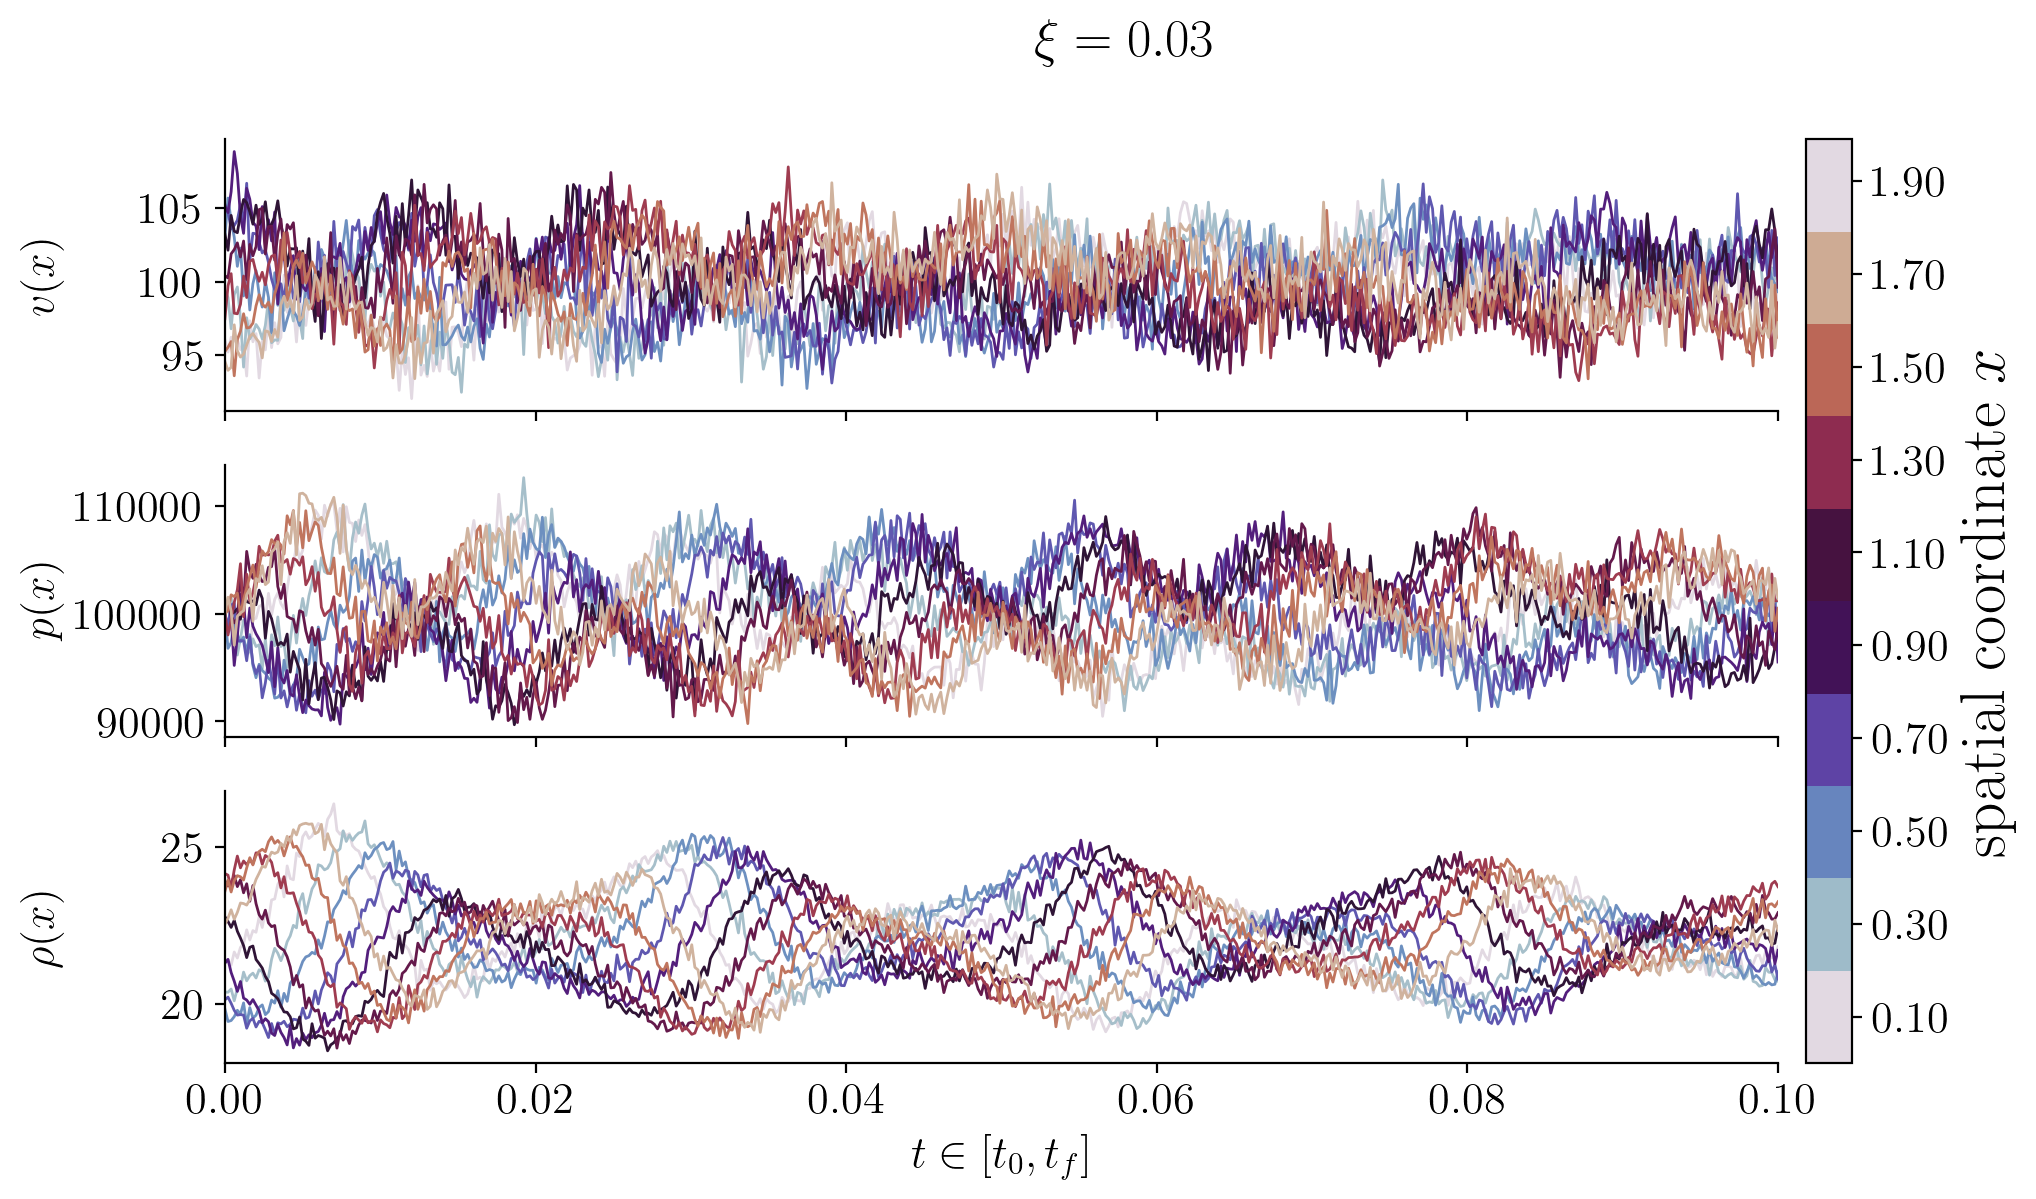

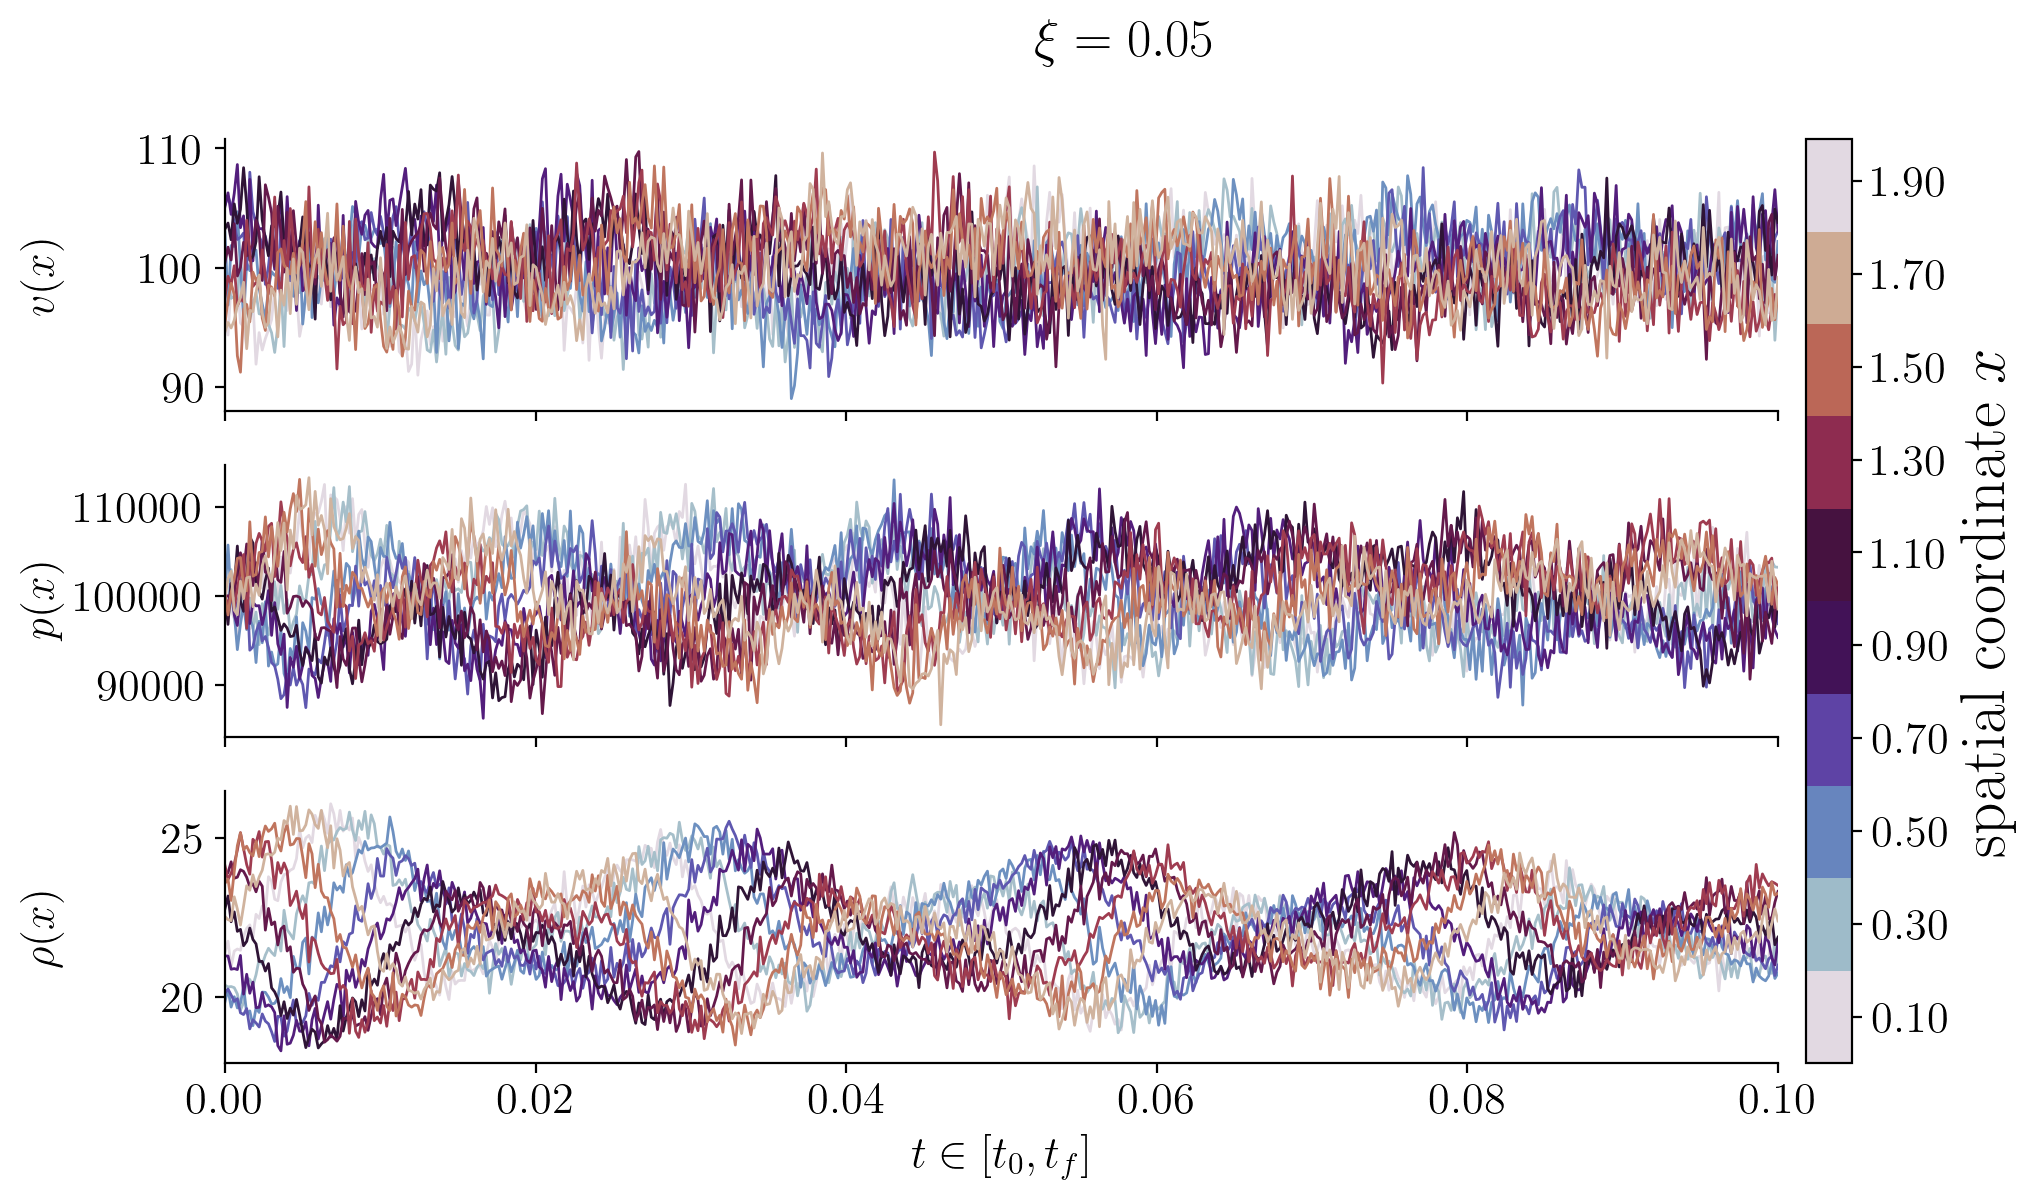

In [4]:
for xi in 0.01, 0.03, 0.05:
    solution_noised = eulersolver.noise(solution, noise_level=xi)
    fig, axes = eulersolver.plot_traces(t, solution_noised, nlocs=10)
    fig.suptitle(rf"$\xi = {xi:.2f}$")
    plt.show()

In [ ]:
eulersolver.animate(solution, skip=4)

In [ ]:
eulersolver.animate(eulersolver.noise(solution, noise_level=0.02), skip=4)

In [ ]:
eulersolver.animate(eulersolver.noise(solution, noise_level=0.05), skip=4)